# Lab 3 - Plotting and Visualization

### Objectives

* Learn the basic functionality of the matplotlib visualization functions and methods.
* Learn the basic functionality of the pandas visualization functions and methods.
* Learn the basic functionality of the seaborn visualization package.

#### 1. (4 pts) Create Jupyter notebook called *Lab-3.ipynb*.

* Be sure to include import statements and any magic commands necessary to complete the lab.

In [3]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. (4 pts) Upload the file *recent_grads.csv* into a `DataFrame` called `data`. 
* Change the index to the `Rank` column.
* Display the first 5 rows of the data.

In [4]:
data = pd.read_csv('recent_grads.csv').set_index('Rank')
data.head()

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


#### 3. (4 pts) Create a figure that holds a 2x1 matrix of subplots.
* In the first subplot, plot the `P75th` column with a dashed, green line and titled 'Line Plot'.
* In the second subplot, plot a histogram of the `Median` column with 50 bins and titled 'Histogram'. 
* Adjust the horizontal spacing between the plots, so the titles can be read. 

Text(0.5, 1.0, 'Histogram')

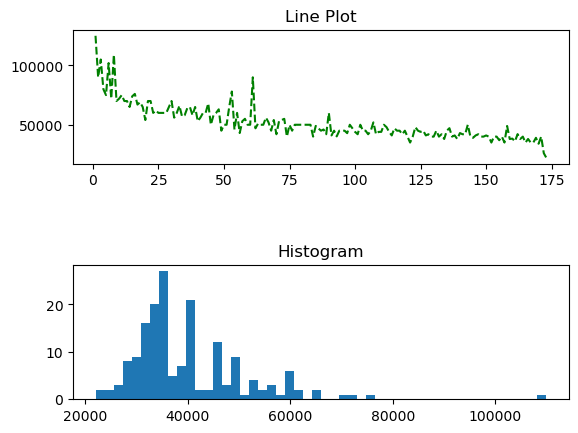

In [5]:
fig, axes = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.75)
axes[0].plot(data['P75th'], 'g--')
axes[0].set_title('Line Plot')
axes[1].hist(data['Median'], bins=50)
axes[1].set_title('Histogram')

#### 4. (4 pts) Create another figure that holds a 2x1 matrix of subplots. 
* In the first subplot, display a scatter plot comparing the `Unemployment_rate` column to the `Median` column and titled "Scatter Plot".
* In the second subplot, display the density plot of the `ShareWomen` column that is  red and titled "Density Plot". 
* Adjust the horizontal spacing between the plots, so the titles can be read. 

Text(0.5, 1.0, 'Density Plot')

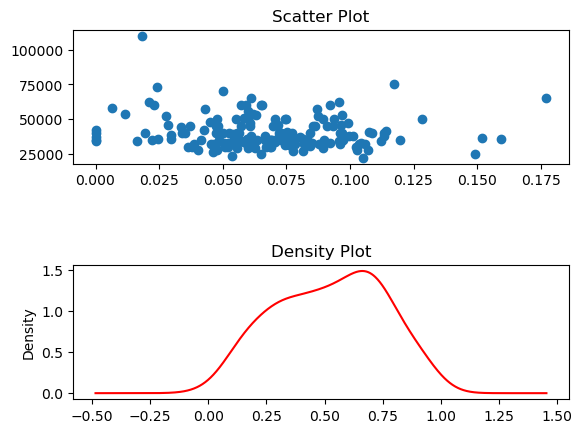

In [6]:
fig, axes = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.75)
axes[0].scatter(data['Unemployment_rate'], data['Median'])
axes[0].set_title('Scatter Plot')
axes[1] = data['ShareWomen'].plot.density(color='r')
axes[1].set_title('Density Plot')

#### 5. (4 pts) Create bar chart of majors with highest median incomes.  
* Create a new `DataFrame` called `top_medians` containing information about the majors with a median income over \\$60,000, sorted (for example, sort_values() function might be helpful) by median income. 
* Create a bar chart with the 25th quartile, median, and 75th quartile incomes for each major and titled 'Top Median Incomes'.  

Text(0.5, 1.0, 'Top Median Incomes')

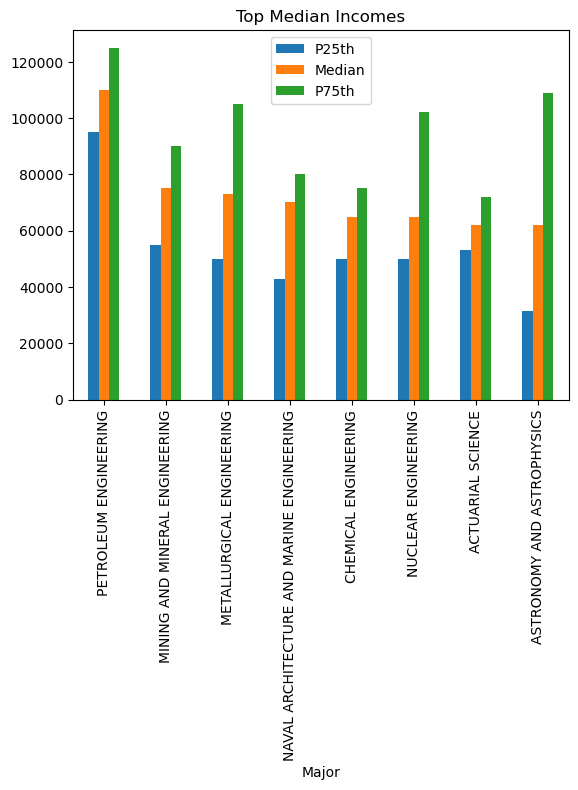

In [10]:
top_medians = data.where(data['Median'] > 60000).dropna()[['Major', 'P25th', 'Median', 'P75th']]
top_medians.sort_values('Median')
ax = top_medians.plot.bar('Major')
ax.set_title('Top Median Incomes')

#### 6. (4 pts) Create another bar chart with the same information above, but turned horizontally with the data stacked for each major and with the same title.  

* Be careful, we want "stacked" bars.

Text(0.5, 1.0, 'Top Median Incomes')

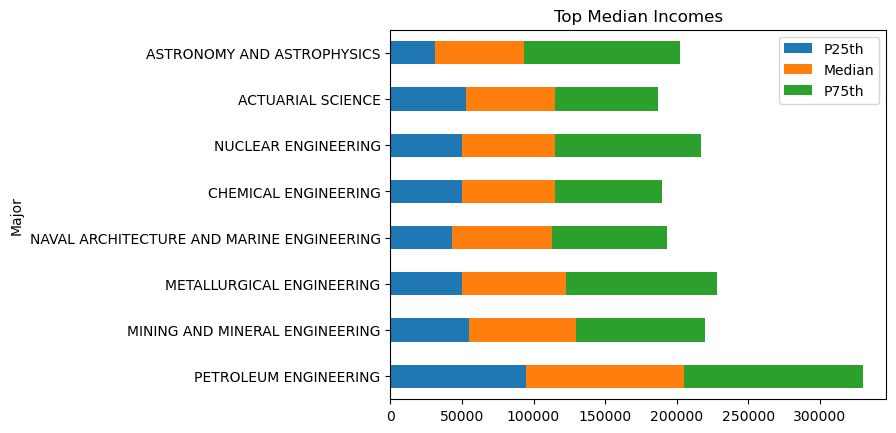

In [11]:
ax = top_medians.plot.barh('Major', stacked=True)
ax.set_title('Top Median Incomes')

#### 7. (4 pts) Create a histogram plot showing the distribution of the median earnings for all of the engineering majors with the title "Median Income for Engineering Majors" and colored red.

<Axes: xlabel='Median', ylabel='Count'>

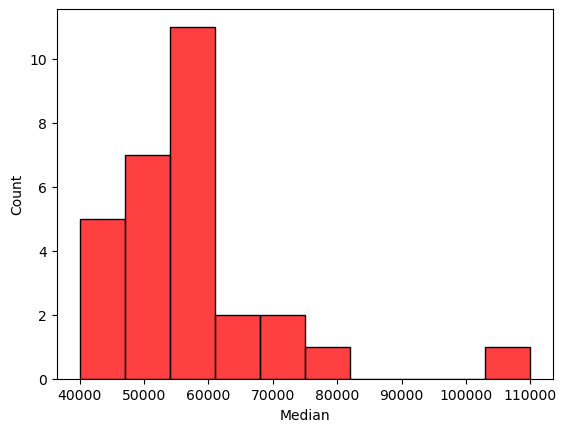

In [49]:
sns.histplot(data['Median'].where(data['Major_category']=='Engineering').dropna(), bins=10, color='r')

#### 8. (4 pts) Create a box plot showing the distribution of the median earnings for the  majors.
* In one cell, display the first five entries in the `DataFrame`. 
* In another cell, display a box plot of the data with the title "Jobs Data".
* Box plots are similar to other plots we have learned. It has similar syntax, check details at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html 


In [54]:
data.head()
jobs_data = data[['College_jobs', 'Non_college_jobs', 'Low_wage_jobs']]

#show the top five rows
jobs_data.head()

,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,
1,1534,364,193
2,350,257,50
3,456,176,0
4,529,102,0
5,18314,4440,972


Text(0.5, 1.0, 'Jobs Data')

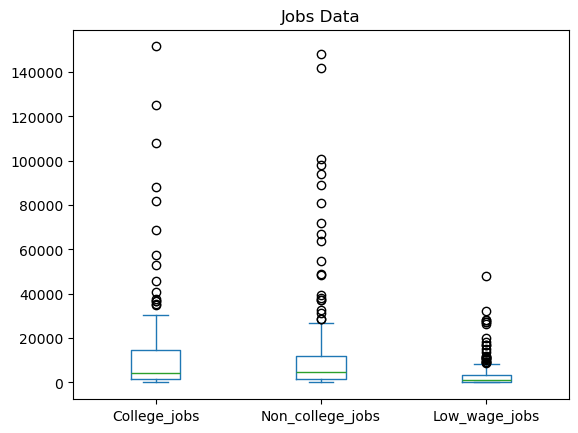

In [57]:
ax = jobs_data.plot.box()
ax.set_title('Jobs Data')

#### 9. (4 pts) Create a new `DataFrame` called `pair_data` with only the `Median`, `ShareWomen`, `Unemployment_rate`, and `College_jobs` data in the `data` DataFrame. 
* In one cell, display the first five entries in this `DataFrame`.
* In another cell, create a pair plot and a display from the information in `pairplot` using the *seaborn* package functions with the title 'Pair Plot'.
* Note: check our notes for "pair plot". 

In [56]:
pair_data = data[['Median', 'ShareWomen', 'Unemployment_rate', 'College_jobs']]
pair_data.head()

,Median,ShareWomen,Unemployment_rate,College_jobs
Rank,,,,
1,110000,0.120564,0.018381,1534
2,75000,0.101852,0.117241,350
3,73000,0.153037,0.024096,456
4,70000,0.107313,0.050125,529
5,65000,0.341631,0.061098,18314


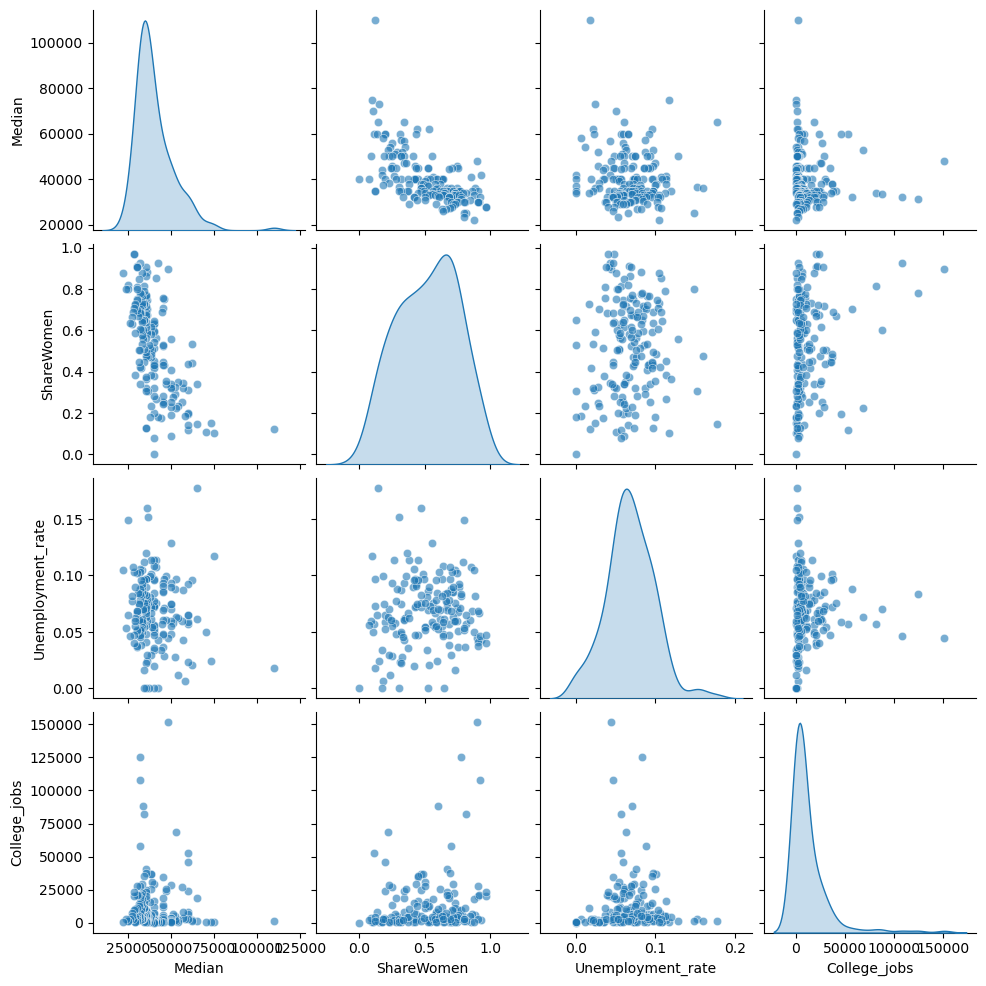

In [60]:
sns.pairplot(pair_data, diag_kind='kde', plot_kws={'alpha': 0.6})

#### 10. (4 pts) Group the information in `data` by its `Major_category`. 
* Find the average of the `ShareWomen` column in this grouping and create a `Series` object from this data with no name (i.e. `name=""`) called `pct_women`. Display its contents. 
* Display the results in a pie chart with the title "Women in Each Major".
* Pie chart plots are similar to other plots we have learned. It has similar syntax, check details at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html


In [64]:
pct_women = data.groupby('Major_category')['ShareWomen'].mean()
pct_women

Major_category
Agriculture & Natural Resources        0.405267
Arts                                   0.603658
Biology & Life Science                 0.587193
Business                               0.483198
Communications & Journalism            0.658384
Computers & Mathematics                0.311772
Education                              0.748507
Engineering                            0.238889
Health                                 0.795152
Humanities & Liberal Arts              0.631790
Industrial Arts & Consumer Services    0.349523
Interdisciplinary                      0.770901
Law & Public Policy                    0.483649
Physical Sciences                      0.508683
Psychology & Social Work               0.794397
Social Science                         0.553962
Name: ShareWomen, dtype: float64

<Axes: ylabel='ShareWomen'>

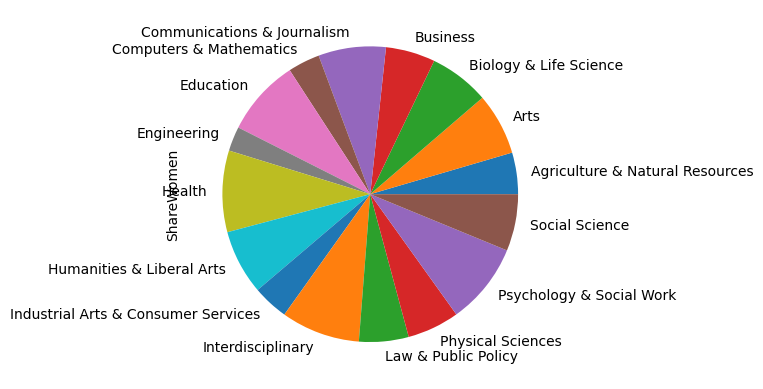

In [68]:
pct_women.plot.pie()